In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

#my libraries
#from savitzky_golay import * #downloaded from: https://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay

In [2]:
# constants

# time for fast neutron to scatter enough times to fall to thermal energies
t_slow = 2.7e-6 # sec (2.7 us)

# time for thermal neutron to capture or decay (or otherwise be removed from consideration)
t_stop = 1e-5 # sec (100 us)

# approx room temperature
T = 298 # K (25 C)

# physical constants
k = co.physical_constants['Boltzmann constant in eV/K'][0] # Boltzmann constant in eV/K
B = 1/k/T # thermal energy constant [1/eV]
m_n = co.physical_constants['neutron mass energy equivalent in MeV'][0]*1e6 # neutron mass in eV
yr = 365*24*3600 # seconds per year
sealevel = 4/3600 # accepted neutron flux at sea level [cm^-2 s^-1]

In [3]:
# functions

def integrate_df(df):
    # (left-sided rectangular integral)
    dE = -df['E'].diff(periods = -1)
    dE.iat[-1] = dE.iat[-2]
    A = df['spec']*dE
    return A.sum()

def maxwell(E, B):
    # height of Maxwell distribution for energy E (eV) and temperature T (K) related to B via B = 1/kT
    return 2*B*np.sqrt(B*E/np.pi)*np.exp(-B*E)

In [4]:
# read in fast neutron flux spectrum (from reading_n_spectra.ipynb)
fast_flux_df = pd.read_pickle('data/FDF.txt') # 'E' in MeV, 'spec' in neutrons cm^-2 sec^-1 MeV^-1


#use numpy arrays
ff = np.asarray(fast_flux_df['E']);
ffspec = np.asarray(fast_flux_df['spec']);

# convert energy units to eV
#fast_flux_df['E'] *= 1e6
#fast_flux_df['spec'] /= 1e6



In [5]:
# calculate flux level of fast neutrons
fast_flux = integrate_df(fast_flux_df)

In [6]:
#smooth the data
ffspec_smooth = signal.savgol_filter(ffspec, 501, 3) # window size 501, polynomial order 3

print(ffspec)
print(ff)
print(np.shape(ff))

[1.36361257e-05 1.24815585e-05 1.15852419e-05 ... 0.00000000e+00
 0.00000000e+00 2.53782390e-12]
[0.01     0.011665 0.01333  ... 9.99501  9.99667  9.99833 ]
(6000,)


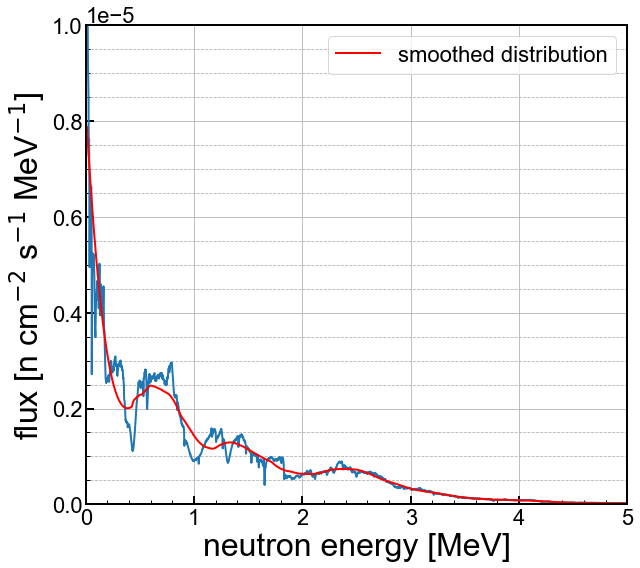

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#print(estring)
ax1.plot(ff, ffspec)
ax1.plot(ff, ffspec_smooth,color='r',label="smoothed distribution")


ymin = 0.0
ymax = 1.0e-5

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0, 5) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

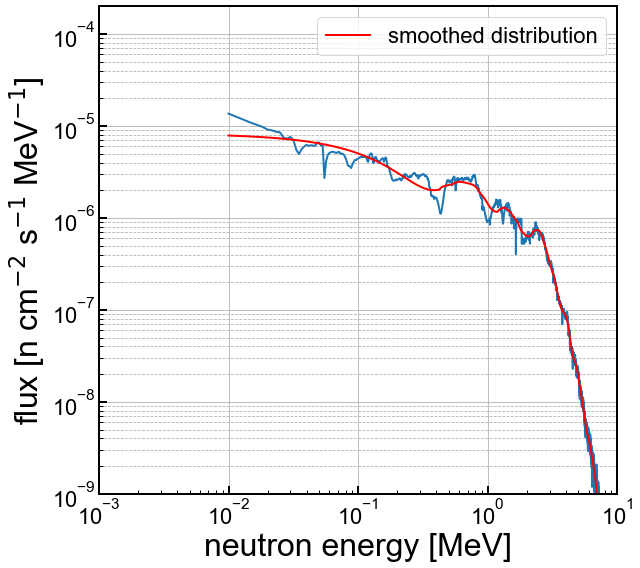

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#print(estring)
ax1.plot(ff, ffspec)
ax1.plot(ff, ffspec_smooth,color='r',label="smoothed distribution")


ymin = 1e-9
ymax = 2.0e-4

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-3, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [9]:
thermal_flux = fast_flux * t_stop/t_slow

print(f'fast neutron flux    = {fast_flux*10000*86400:4.1f} n m^-2 day^-1')
print(f'thermal neutron flux = {thermal_flux*10000*86400:4.1f} n m^-2 day^-1')
print(f'SNOLAB-measured thermal neutron flux = {4144.9:4.1f} n m^-2 day^-1')
print(f'sea level flux       = {sealevel*10000*86400:4.1f} n m^-2 day^-1')

fast neutron flux    = 4000.0 n m^-2 day^-1
thermal neutron flux = 14814.8 n m^-2 day^-1
SNOLAB-measured thermal neutron flux = 4144.9 n m^-2 day^-1
sea level flux       = 960000.0 n m^-2 day^-1


In [10]:
#thermal neutron fluxes in better units:

print(f'thermal neutron flux = {thermal_flux:1.2e} n cm^-2 s^-1')
print(f'SNOLAB-measured thermal neutron flux = {4144.9/10000/86400:1.2e} n cm^-2 s^-1')
print(f'SOUDAN-measured thermal neutron flux = {0.7e-6:1.2e} n cm^-2 s^-1') #andreas best measurement
print(f'SOUDAN-measured thermal neutron flux = {7.2e-2/3600:1.2e} n cm^-2 s^-1') #my estimate of SuperCDMS germanium rate.
print(f'sea level flux       = {sealevel:1.2e} n cm^-2 s^-1')

thermal neutron flux = 1.71e-05 n cm^-2 s^-1
SNOLAB-measured thermal neutron flux = 4.80e-06 n cm^-2 s^-1
SOUDAN-measured thermal neutron flux = 7.00e-07 n cm^-2 s^-1
SOUDAN-measured thermal neutron flux = 2.00e-05 n cm^-2 s^-1
sea level flux       = 1.11e-03 n cm^-2 s^-1


In [11]:
Es = np.geomspace(0.0001, 1e4, 2000)
Max = maxwell(Es, B)
snothermal = 4144.9/10000/86400
Therms = snothermal*Max

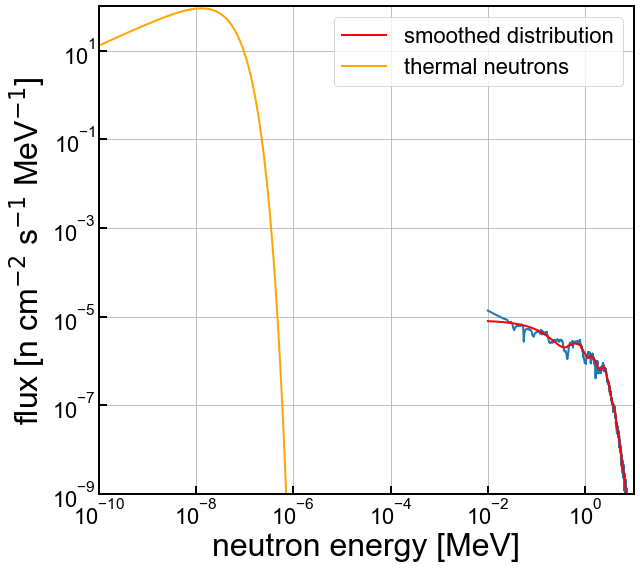

In [12]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#print(estring)
ax1.plot(ff, ffspec)
ax1.plot(ff, ffspec_smooth,color='r',label="smoothed distribution")
ax1.plot(Es/1e6, Therms*1e6,color='orange',label="thermal neutrons")


ymin = 1e-9
ymax = 100.0

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-10, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [13]:
cutoff=0.3

ffhe = ff[ff>cutoff]
ffhespec = ffspec[ff>cutoff]

#smooth the data
ffhespec_smooth = signal.savgol_filter(ffhespec, 2001, 3) # window size 1001, polynomial order 3

ffle = ff[ff<=cutoff]
fflespec = ffspec[ff<=cutoff]
print(np.size(ffle))

#smooth the data
fflespec_smooth = signal.savgol_filter(fflespec, 75, 3) # window size 1001, polynomial order 3

175


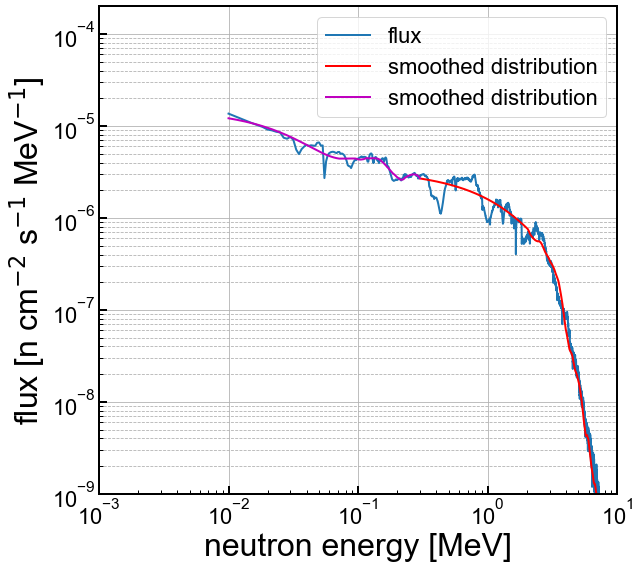

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#print(estring)
ax1.plot(ff, ffspec,label='flux')
ax1.plot(ffhe, ffhespec_smooth,color='r',label="smoothed distribution")
ax1.plot(ffle, fflespec_smooth,color='m',label="smoothed distribution")


ymin = 1e-9
ymax = 2.0e-4

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-3, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [15]:
# extrapolate line from lower-energy fast neutrons
E_thresh = 2e-2 # upper bound of linear region
E_therm = 0.15e-6 # near boundary of where thermal distribution has peak

fast_lin_df = ffle[ffle < E_thresh]
fast_lin_df_spec = fflespec_smooth[ffle< E_thresh]

In [16]:
fitted_line = ss.linregress(np.log(fast_lin_df), np.log(fast_lin_df_spec))
print(fitted_line)

LinregressResult(slope=-0.34198906017017205, intercept=-12.883178144228607, rvalue=-0.9953352356165472, pvalue=2.8473572672917526e-06, stderr=0.014824519476613129, intercept_stderr=0.06273875262265781)


In [17]:
def fast_extrapolation_line(E):
    # return height of fitted loglog line, if energy is larger than thermal threshold
    return np.exp(fitted_line.intercept + fitted_line.slope*np.log(E))*(E > E_therm)

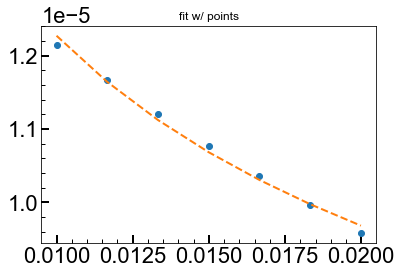

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('fit w/ points')
ax.plot(fast_lin_df, fast_lin_df_spec, 'o')
ax.plot(fast_lin_df, fast_extrapolation_line(fast_lin_df), linestyle = 'dashed')

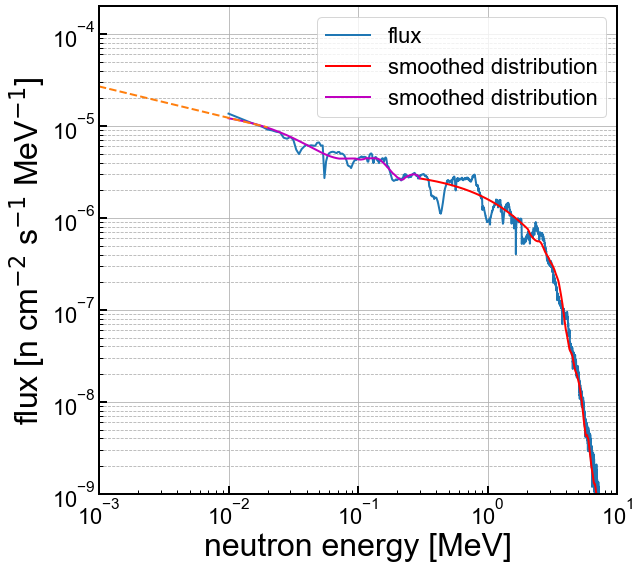

In [19]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes
EE = np.geomspace(1000e-6, 2e-2, 10_000)


#print(estring)
ax1.plot(ff, ffspec,label='flux')
ax1.plot(ffhe, ffhespec_smooth,color='r',label="smoothed distribution")
ax1.plot(ffle, fflespec_smooth,color='m',label="smoothed distribution")
plt.plot(EE, fast_extrapolation_line(EE), linestyle = 'dashed')


ymin = 1e-9
ymax = 2.0e-4

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-3, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

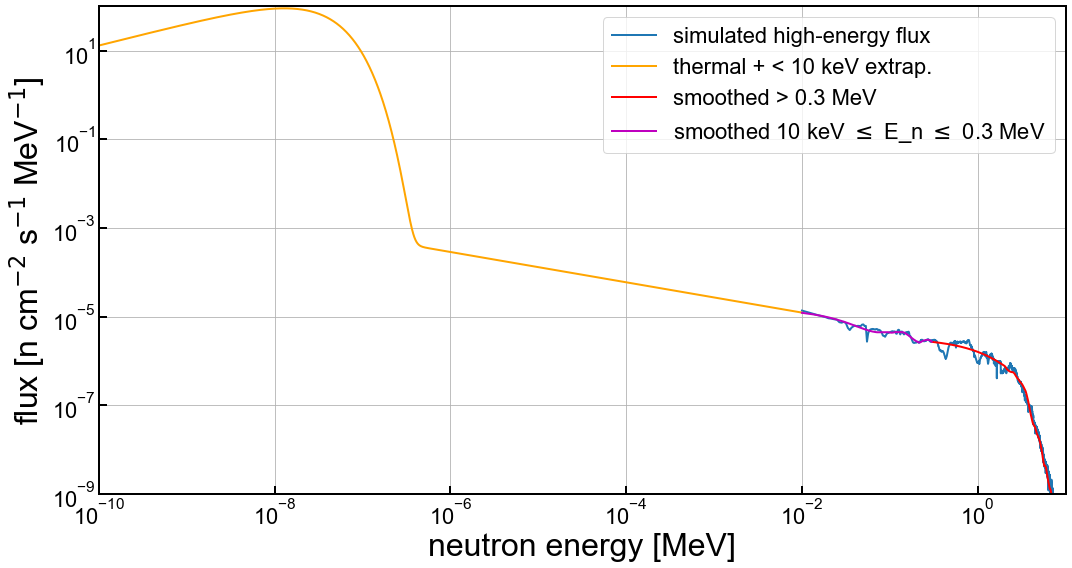

In [20]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

EE = np.geomspace(1000e-6, 2e-2, 10_000)
#Es = np.geomspace(0.0001e-6, 1e-2, 2000)

Therms_new = snothermal*Max + fast_extrapolation_line(Es/1e6)/1e6

#print(estring)
ax1.plot(ff, ffspec,label='simulated high-energy flux')
ax1.plot(Es/1e6, Therms_new*1e6,color='orange',label="thermal + < 10 keV extrap.")

ax1.plot(ffhe, ffhespec_smooth,color='r',label="smoothed > 0.3 MeV")
ax1.plot(ffle, fflespec_smooth,color='m',label="smoothed 10 keV $\leq$ E_n $\leq$ 0.3 MeV")
#ax1.plot(Es/1e6, fast_extrapolation_line(Es/1e6), linestyle = 'dashed')


ymin = 1e-9
ymax = 100.0

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-10, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
plt.savefig('figures/nfluxSNOLAB.pdf')
plt.show()

In [21]:
Etherm = Es/1e6

print(np.size(Etherm),np.size(ffle),np.size(ffhe))
print(np.shape(Etherm))

2000 175 5825
(2000,)


In [22]:
etot = np.concatenate((Etherm,ffle,ffhe))
etot = np.unique(etot)
etotspec = np.zeros((np.size(etot),),dtype=np.float64)
print(np.size(etot),np.size(etotspec))

7999 7999


In [23]:
print(np.shape(etot))

(7999,)


In [24]:
print(Etherm[-10:-1])
print(Etherm[1998])
print(np.size(etotspec[etot<Etherm[-1]]))
print(ffle[0])

[0.00920411 0.00928932 0.00937532 0.00946211 0.00954971 0.00963811
 0.00972734 0.00981739 0.00990827]
0.00990827379670935
1999
0.01


In [25]:
etotspec[etot<=Etherm[-1]] = Therms_new*1e6

In [26]:
etotspec[(etot>Etherm[-1])&(etot<ffle[-5])] = fflespec_smooth[1:-5]

In [27]:
etotspec[(etot>ffle[-1])] = ffhespec_smooth

In [28]:
dee = etotspec>1.0e-9
etot = etot[dee]
etotspec = etotspec[dee]

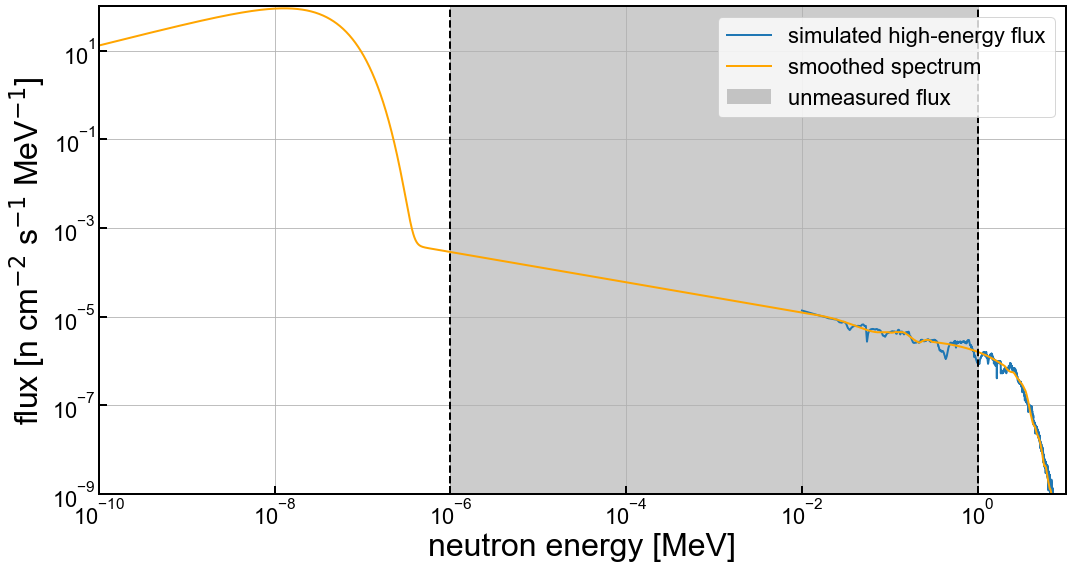

In [29]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


#print(estring)
ax1.plot(ff, ffspec,label='simulated high-energy flux')
ax1.plot(etot, etotspec,color='orange',label="smoothed spectrum")



ymin = 1e-9
ymax = 100.0

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.axvline(x=1e-6,color='k',linestyle="--")
plt.axvline(x=1,color='k',linestyle="--")
ax1.fill_between([1e-6,1],[1e-9,1e-9],[100,100],facecolor='k',alpha=0.2,label='unmeasured flux')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-10, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
plt.savefig('figures/LTD20-flux.pdf')
plt.show()

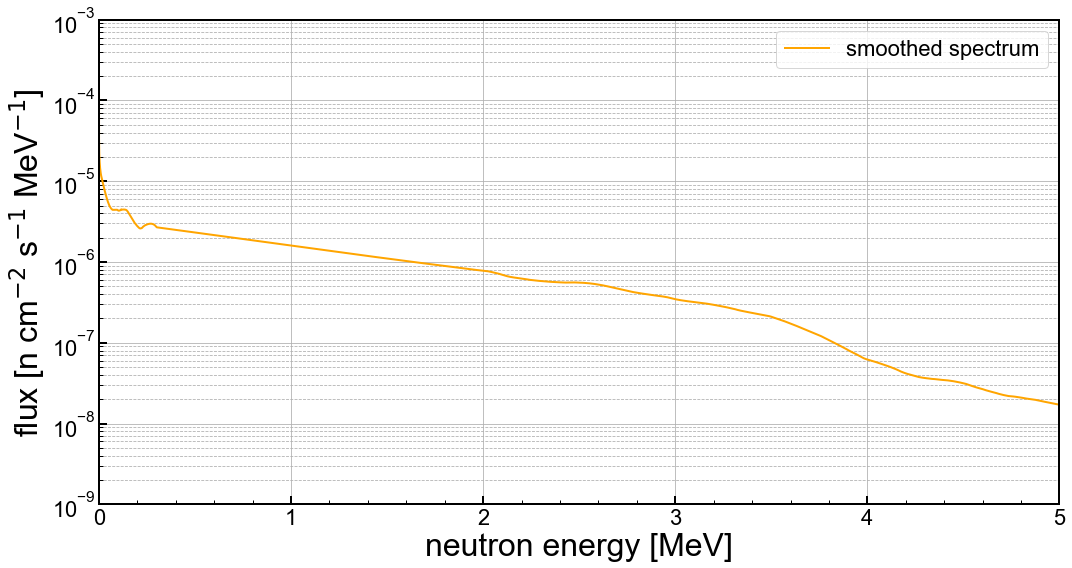

In [30]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


#print(estring)
#ax1.plot(ff, ffspec,label='simulated high-energy flux')
ax1.plot(etot, etotspec,color='orange',label="smoothed spectrum")



ymin = 1e-9
ymax = 1e-3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

#plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(1e-10, 5) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('flux [n cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [31]:
spec = pd.DataFrame()
spec['E']=etot
spec['spec']=etotspec
print(integrate_df(spec))

9.61697580449546e-06


In [32]:
def cdf(df,E):
    cdf_spec = pd.DataFrame()
    cdf_spec['E']=etot[etot<=E]
    cdf_spec['spec']=etotspec[etot<=E]
    return integrate_df(cdf_spec)/9.61697580449546e-06

In [33]:
print(cdf(spec,1.0))

0.8010911285695771


In [34]:
import scipy.optimize as so

def invcdf(df,p):
    f = lambda a: cdf(df,a)-p
    #print(f(0.9938433965248))
    return so.brentq(f,1e-9,10,rtol=0.0001,maxiter=100)

In [35]:
print(invcdf(spec,0.8))

0.9939963205812054


In [36]:
from scipy.stats import uniform

r = uniform.rvs(size=10)

In [37]:
print(r)

[0.56555971 0.76533131 0.83604806 0.63608571 0.83585467 0.81478796
 0.58292946 0.3156288  0.10028875 0.19595202]


In [38]:
invcdf_l = lambda r: invcdf(spec,r)

invcdf_l_vec = np.vectorize(invcdf_l)

In [39]:
print(invcdf_l_vec(r))

[7.16062356e-02 8.00852732e-01 1.22878062e+00 2.59746905e-01
 1.22714306e+00 1.08554644e+00 1.09895252e-01 4.03012827e-08
 1.29709999e-08 2.34021760e-08]


In [40]:
r = uniform.rvs(size=1000)
r = r[r>0.003] #this is the point where it starts to fail. 

In [41]:
egen = invcdf_l_vec(r)

In [42]:
#make histos (counts per day)


ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(egen,bins=ebins)

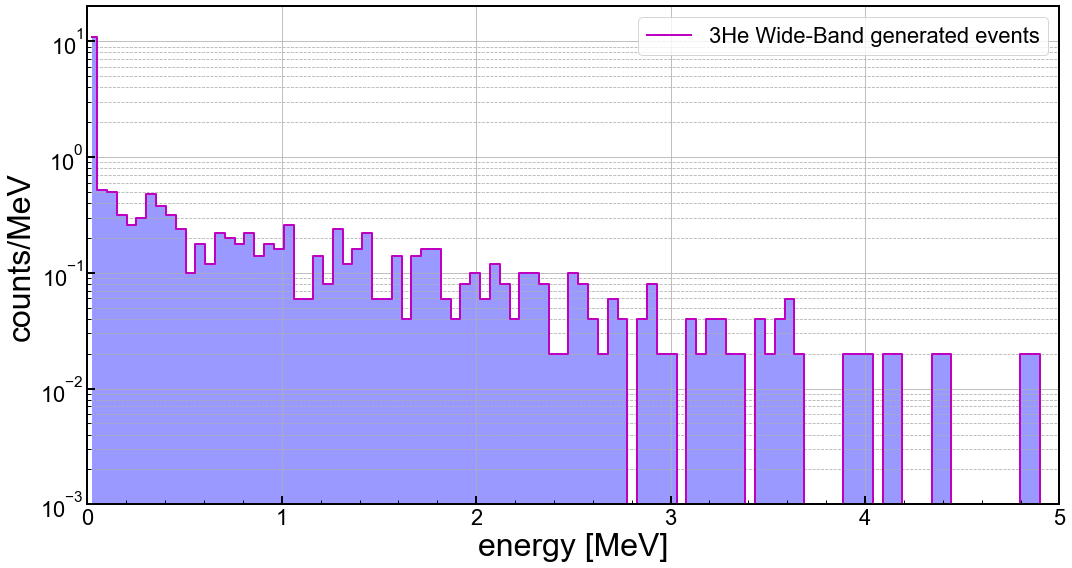

In [43]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq)[0]


#print(estring)
ax1.step(xcq,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)


ymin = 1e-3
ymax = 20.0

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [MeV]')
ax1.set_ylabel('counts/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()